## Predicting pneumonia using pretrained ResNet-50 on lung image data

Dataset taken from here: https://www.kaggle.com/datasets/iamtapendu/rsna-pneumonia-processed-dataset. 
Code and prerained model are taken from this notebook: https://www.kaggle.com/code/iamtapendu/pneumonia-detection-resnet-50

The dataset is a pre-processed version of the RSNA Pneumonia Detection Challenge dataset. 
The images are in PNG format; the metadata, including the patient information and bounding box coordinates, has been extracted and saved in CSV format for easy integration into machine learning models.

The model used for inference is a pretrained image classification model ResNet-50.

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras import models
from utils import DataGenerator

MODEL_PATH = os.environ['MODEL_DIR']

: 

In [3]:
#loading the metadata
train_metadata = pd.read_csv('./data/stage2_train_metadata.csv')
train_metadata.drop(['x','y','width','height'],axis=1,inplace=True)
train_metadata.drop_duplicates(inplace=True)

In [ ]:
#splitting into train and validation sets
train_patient_id, val_patient_id, train_target, val_target = train_test_split(
    train_metadata.patientId, 
    train_metadata['Target'],    
    test_size=0.1,
    stratify=train_metadata['Target'],
    random_state=123
)

In [34]:
#generation of validation batches
val_data = DataGenerator(
    patient_id=val_patient_id.tolist(),
    target_class=val_target.tolist(),    
    batch_size=8,          
    size=(512, 512),
    workers=4,
    use_multiprocessing=True
)

In [5]:
# Loading the pre-trained model
model = models.load_model(MODEL_PATH+'best_model_auc.keras')

2024-12-23 19:47:28.274434: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


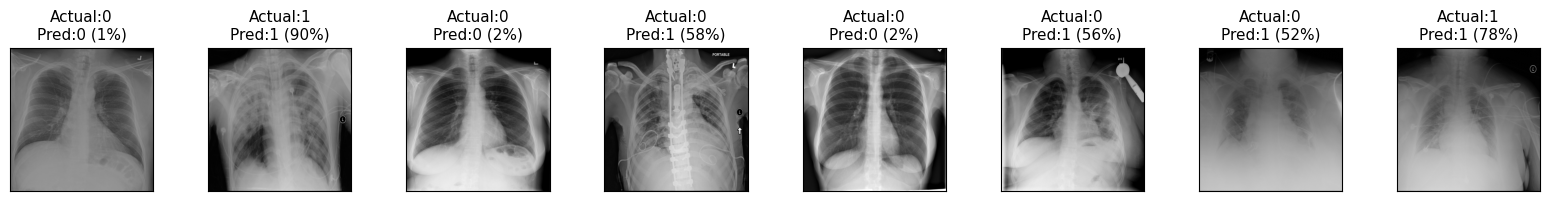

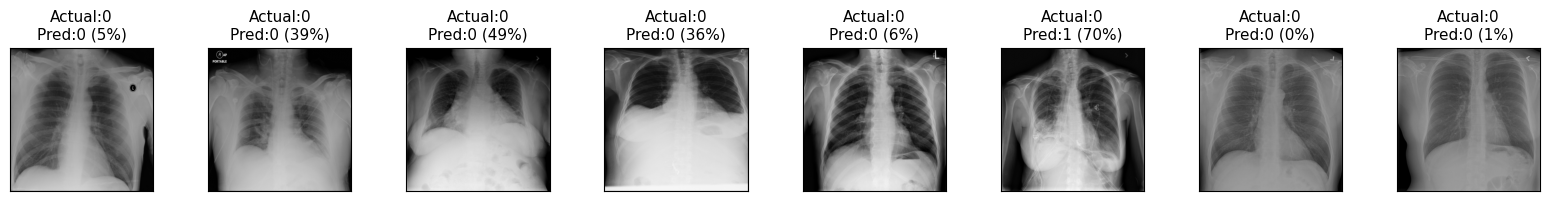

In [51]:
#running inference on some validation data
for it in range(2):
    imgs,clss = val_data.__getitem__(it)
    pred_prob = np.squeeze(model.predict(imgs,verbose=0))
    pred_cls = (pred_prob>0.5).astype(int)
    
    fig, ax = plt.subplots(1,8,figsize=(16,2))
    ax = ax.flatten()
    for i,img in enumerate(imgs):
        ax[i].imshow(img)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title(f'Actual:{clss[i]}\nPred:{pred_cls[i]} ({round(pred_prob[i]*100)}%)',fontsize=11)
    
    plt.tight_layout()
    plt.show()